# Introduction

In this notebook, I am going to write a single-variable Linear Regression model that predicts the price of a house using its GrLivArea column. Then, the model will be compared to a scikit-learn built-in Linear Regression model to see the performance of our implementation.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.optimize import minimize

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
full_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

# Model Implementation

**1. Preprocessing**

For our model, we will just use the GrLivArea column as input. Then, to make gradient descent more efficient and increase the performance of the model, I will normalize the input and add a bias unit. I will also create some variables for training and separate the train and test sets

In [3]:
X = full_data['GrLivArea']
y = full_data['SalePrice']

In [4]:
X = (X - X.mean()) / X.std()
X = np.c_[np.ones(X.shape[0]), X] 

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [6]:
learning_rate = 0.01
iterations = 10000
m = y_train.shape[0]
theta = np.zeros(2)

**3. Hypothesis Function**

The hypothesis function of a Linear Regression model is as follows:

![](https://i2.wp.com/contentsimplicity.com/wp-content/uploads/2019/05/18d7e-1eieyrsqib85cpa32zapqwq.png?w=1080&ssl=1)

In [7]:
def predict(X, theta):
    return np.dot(X, theta)

**4. Gradient Descent**

Gradient descent allows the model to find theta parameters that minimize the loss, which is the sum of the sqaure of differences between predicted values and actual values. The idea of gradient descent is to slowly change theta so it moves to the direction that minimizes the loss. Specifically, the procedure of gradient descent is:

![](https://miro.medium.com/max/900/1*G3evFxIAlDchOx5Wl7bV5g.png)

In [8]:
def gradient_descent(X, y, theta, iterations, learning_rate):
    losses = []
    thetas = [theta]
    for i in range(iterations):
        y_pred = predict(X, theta)
        error = y_pred - y
        loss = 1/(2*m) * np.dot(error.T, error)
        losses.append(loss)
        theta = theta - (learning_rate * (1/m) * np.dot(X.T, error))
        thetas.append(theta)
        
    return thetas, losses

In [9]:
thetas, losses = gradient_descent(X_train, y_train, theta, iterations, learning_rate)
theta = thetas[-1]

# Evaluation

Now we have implemented a Simple Linear Regression model. Let's check how well it is performing.

**1. Loss Function**

The graph clearly shows that we effectively reduces the loss of our model, which means our implmentation is successful. 

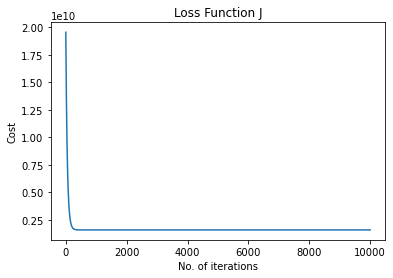

In [10]:
plt.title('Loss Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(losses)
plt.show()

In [11]:
Y_pred = theta[0] + theta[1] * X_test

In [12]:
X_test_draw = np.delete(X_test, 0, 1) 

In [13]:
Y_pred_draw = np.delete(Y_pred, 0, 1)

**2. Regression Plots**

Our Regression Plot:

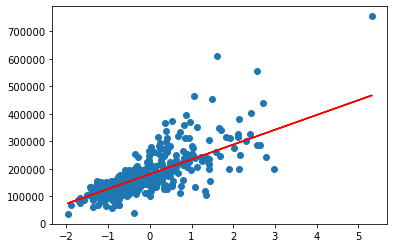

In [14]:
plt.scatter(X_test_draw, y_test)
plt.plot(X_test_draw, Y_pred_draw, color='red')
plt.show()

Scikit-learn Regression Plot:

In [15]:
from sklearn.linear_model import LinearRegression

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

reg_pred = reg_model.predict(X_test)

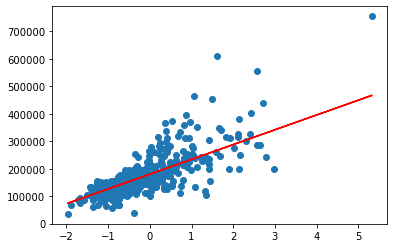

In [16]:
plt.scatter(X_test_draw, y_test)
plt.plot(X_test_draw, reg_pred, color='red')
plt.show()

The two graphs show that our model is very similar to the built-in Linear Regression model, which again shows our implementation is successful.

**3. Coefficients**

In [17]:
reg_model.coef_

array([    0.        , 53844.68407667])

In [18]:
theta

array([180098.42294697,  53844.68407667])

The coefficients are also almost the same, so our model is achieving the performance of the scikit-learn one. 

**4. Errors**

In [19]:
import math
from sklearn.metrics import mean_squared_error

def root_mean_squared_log_error(y_valid, y_preds):
    """Calculate root mean squared error of log(y_true) and log(y_pred)"""
    if len(y_preds)!=len(y_valid): return 'error_mismatch'
    y_preds_new = [math.log(x) for x in y_preds]
    y_valid_new = [math.log(x) for x in y_valid]
    return mean_squared_error(y_valid_new, y_preds_new, squared=False)

In [20]:
root_mean_squared_log_error(y_test, Y_pred_draw)

0.2748269606496895

In [21]:
root_mean_squared_log_error(y_test, reg_pred)

0.27482696064969087

So the root mean squared log error(which is the error Kaggle evalues output for this dataset) shows that our model is performancing identical to the scikit-learn one. So overall our implementation is very successful.